# This Program representes composite analysis of NINO3.4 and tries to find out the impacts of its each components on SST.


#### Author: Chandrima (chakrabartychandrima91@gmail.com)

In [22]:
import pandas as pd
import numpy as np

In [24]:
import matplotlib.pyplot as plt

from cartopy import config
import cartopy.crs as ccrs


In [25]:
nino34 = pd.read_csv('nino3.4_index.csv',names=["Years", "Jan", "Feb", "Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov", "Dec"])
#assign col name of downloaded data

In [27]:
df = nino34.set_index('Years').stack().reset_index(name='nino3.4').drop('level_1',1) #make everything in one column

In [29]:
date = pd.date_range('1948-01-01', '2021-12-31',freq='MS') #assign date range

In [31]:
df.index = date
df_ = df.replace(-99.99,np.NaN)
df_ = df_.drop('Years',axis=1)
df_mean = df_.mean()
# df_mean  #remove # if you want to ckeck
df_anom = df_ - df_mean
df_anom.plot()   #see anomally to decide the value range before define components value
#df_anom.max()
#df_anom.std()

##### Create 8 components of NINO3.4 

In [40]:
c1 = (df_anom[(df_anom['nino3.4'] < -0.5) & (df_anom['nino3.4'] >= -1)]) #LANINA
c1=c1.loc['1990':'2020']

In [151]:
c2 = (df_anom[(df_anom['nino3.4'] <= 0) & (df_anom['nino3.4'] >= -0.5)])
c2=c2.loc['1990':'2020']

In [153]:
c3 = (df_anom[(df_anom['nino3.4'] <= 0.5) & (df_anom['nino3.4'] > 0)]) #ELNINO
c3=c3.loc['1990':'2020']

In [155]:
c4 = (df_anom[(df_anom['nino3.4'] <= 1) & (df_anom['nino3.4'] > 0.5)]) #ELNINO
c4=c4.loc['1990':'2020']

In [157]:
c5 = (df_anom[(df_anom['nino3.4'] <= 1.5) & (df_anom['nino3.4'] > 1)]) #ELNINO
c5=c5.loc['1990':'2020']

In [159]:
c6 = (df_anom[(df_anom['nino3.4'] <= 2) & (df_anom['nino3.4'] > 1.5)]) #ELNINO
c6=c6.loc['1990':'2020']

In [161]:
c7 = (df_anom[(df_anom['nino3.4'] <= 2.5) & (df_anom['nino3.4'] > 2)]) #ELNINO
c7=c7.loc['1990':'2020']

In [163]:
c8 = (df_anom[(df_anom['nino3.4'] <= 3) & (df_anom['nino3.4'] > 2.5)]) #ELNINO
c8=c8.loc['1990':'2020']

##### Import SST data and see the impact of each components

In [165]:
import xarray as xr
temp=xr.open_dataset('489078.sst.HadISST_sst.nc',decode_times=False)

In [169]:
temp_masked = temp.where(temp['sst'] != -1000)   #replace all -1000 values with nan

In [171]:
date_temp = pd.date_range('1989-12-16', '2021-02-16',freq='MS') #define date range

In [173]:
temp_masked['time'] = date_temp.values

In [174]:
temp_masked_c1=temp_masked.sel(time=c1.index) #select dates as in c1 dataset

In [195]:
#temp_masked_c1.mean(dim='time').sst.plot() #you can use this for simple plotting

# Plotting SST

C:\Users\Abir\anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


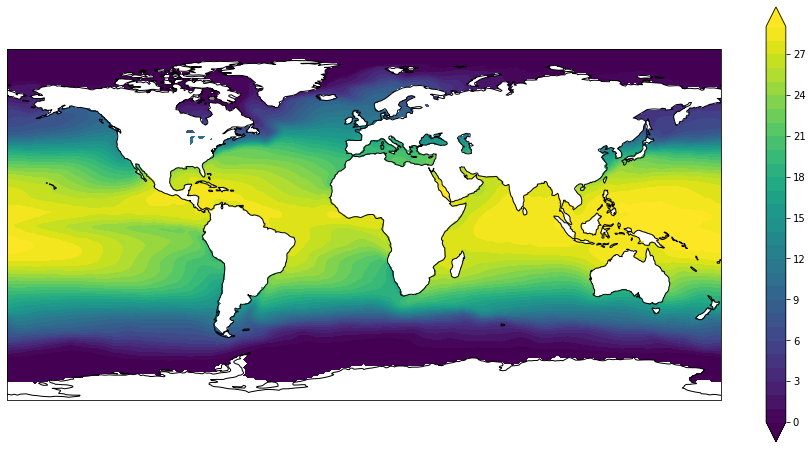

In [196]:
plt.figure(figsize=[16,8])

#plt.subplot(1,2,1)
ax = plt.axes(projection=ccrs.PlateCarree())
c =plt.contourf(temp_masked_c1.longitude,temp_masked_c1.latitude,temp_masked_c1.mean(dim='time').sst,levels=np.arange(0,30,1),
                extend='both',transform=ccrs.PlateCarree())
plt.colorbar(c)
ax.coastlines()

# plt.subplot(1,2,2)
# plt.contourf(temp_c3.mean(dim='time'))
# plt.colorbar(c)
plt.savefig('SST_c1.png')

Text(0.5, 1.0, 'Elnino-Lanina')

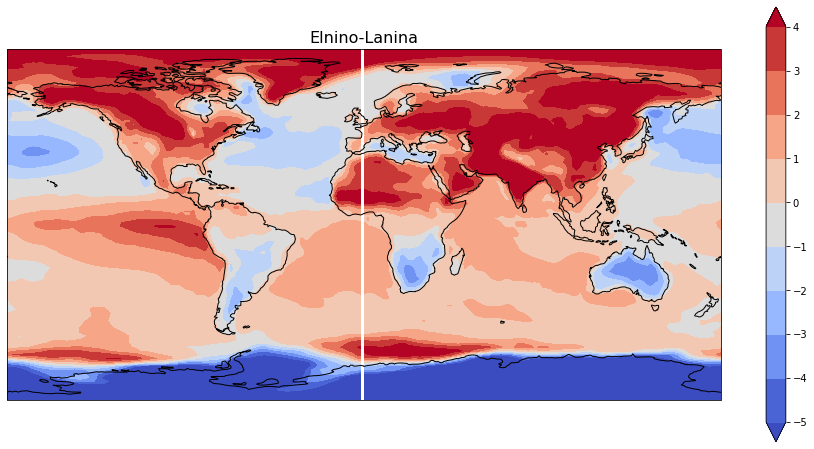

In [84]:
plt.figure(figsize=[16,8])


ax = plt.axes(projection=ccrs.PlateCarree())
c =plt.contourf(temp_c3.lon,temp_c3.lat,temp_c3.mean(dim='time')-temp_c1.mean(dim='time'),levels=np.arange(-5,5,1),
                cmap='coolwarm',extend='both',transform=ccrs.PlateCarree())
plt.colorbar(c)
ax.coastlines()

plt.title('Elnino-Lanina',fontsize=16)